In [ ]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import html

In [ ]:
# Load the Data

train_data = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\train.csv")
test_data = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\test.csv")
submit_sample = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\submit.csv")

In [ ]:
# Total number of fake news and true news in the submit dataset

import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\submit.csv")

# Count the occurrences of 0 and 1 in the 'label' column
true_news_count = df[df['label'] == 0].shape[0]
fake_news_count = df[df['label'] == 1].shape[0]

# Output the total number of true news and fake news
print(f"Total number of true news: {true_news_count}")
print(f"Total number of fake news: {fake_news_count}")


Total number of true news: 2339
Total number of fake news: 2861


In [8]:
# Inspect data structure
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)
print(train_data.head())
print(test_data.head())  # Check if columns match expected names
print(train_data.columns)
print(test_data.columns)

Train Data Shape: (20800, 5)
Test Data Shape: (5200, 4)
   id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1  
      id                                              title  \
0  20800  Specter of Trump L

In [ ]:
# Missing Values
# Assume 'text' is the content column and 'label' is the target
print("Missing values in Train Data:", train_data.isnull().sum())
print("Missing values in Test Data:", test_data.isnull().sum())

Missing values in Train Data: id           0
title      558
author    1957
text        39
label        0
dtype: int64
Missing values in Test Data: id          0
title     122
author    503
text        7
dtype: int64


In [10]:
# Fill missing values in the 'text' column
train_data['text'] = train_data['text'].fillna('')
test_data['text'] = test_data['text'].fillna('')

In [ ]:
# Preprocessing
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Rejoin the tokens into a single string
    cleaned_text = " ".join(tokens)

    return cleaned_text

# Example usage on a single news article
example_text = "Breaking News: Fake news is spreading fast! Don't believe it!"
processed_text = preprocess_text(example_text)
print(processed_text)

breaking news fake news spreading fast dont believe


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\slpri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\slpri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Fit on training data and transform train and test text
X_train_tfidf = tfidf.fit_transform(train_data['text'])
X_test_tfidf = tfidf.transform(test_data['text'])

print(X_train_tfidf.shape)  # Confirm if it's properly initialized

# Extract target labels
y_train = train_data['label']

(20800, 5000)


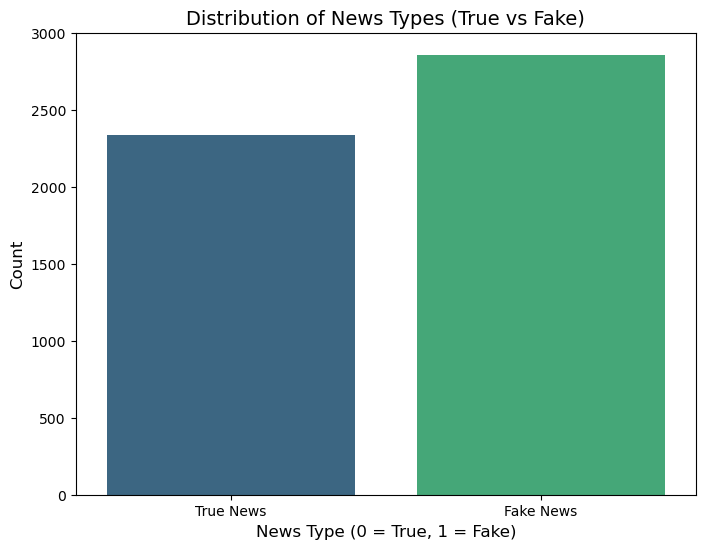

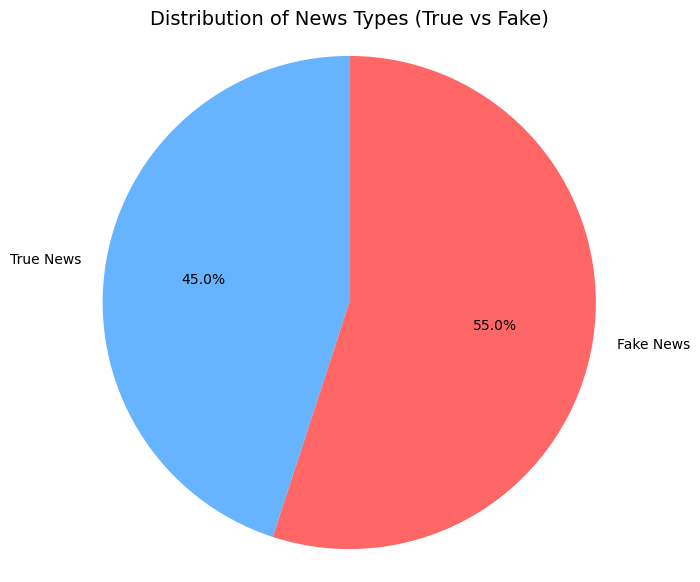

In [100]:
#bar graph and pie chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with your actual file path)
df = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\submit.csv")

# Count the occurrences of 0 (true news) and 1 (fake news)
label_counts = df['label'].value_counts()

# Ensure correct ordering of values in the pie chart
label_counts = label_counts.sort_index()

# Set up the matplotlib figure for the bar graph
plt.figure(figsize=(8, 6))

# Bar Graph
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of News Types (True vs Fake)', fontsize=14)
plt.xlabel('News Type (0 = True, 1 = Fake)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['True News', 'Fake News'])
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(label_counts, labels=['True News', 'Fake News'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Distribution of News Types (True vs Fake)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


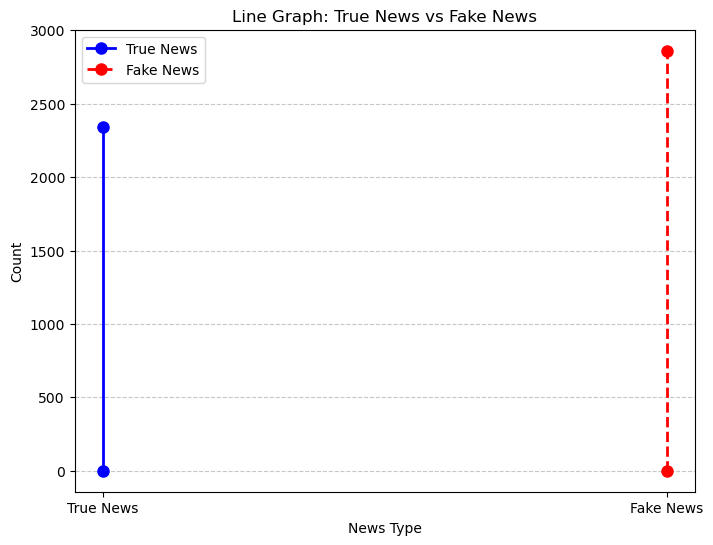

In [104]:
#line graph
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace with your own DataFrame)
# df = pd.read_csv("C:\Users\slpri\OneDrive\Desktop\Data Mining Techniques\submit.csv")

# 3. Line Graph to compare the count of True vs Fake News
plt.figure(figsize=(8, 6))

# Count of True and Fake News
news_counts = df['label'].value_counts().sort_index()
true_count = news_counts[0] if 0 in news_counts else 0
fake_count = news_counts[1] if 1 in news_counts else 0

# Plot the line graph for True News and Fake News as non-overlapping lines
# True News line at y = true_count
plt.plot([1, 1], [0, true_count], marker='o', color='blue', linewidth=2, markersize=8, label='True News')
# Fake News line at y = fake_count (shifted downward for clarity)
plt.plot([2, 2], [0, fake_count], marker='o', color='red', linewidth=2, markersize=8, label='Fake News', linestyle='--')

# Add titles and labels
plt.title('Line Graph: True News vs Fake News')
plt.xticks(ticks=[1, 2], labels=['True News', 'Fake News'])
plt.xlabel('News Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend to differentiate between True and Fake news lines
plt.legend()

# Display the line graph
plt.show()


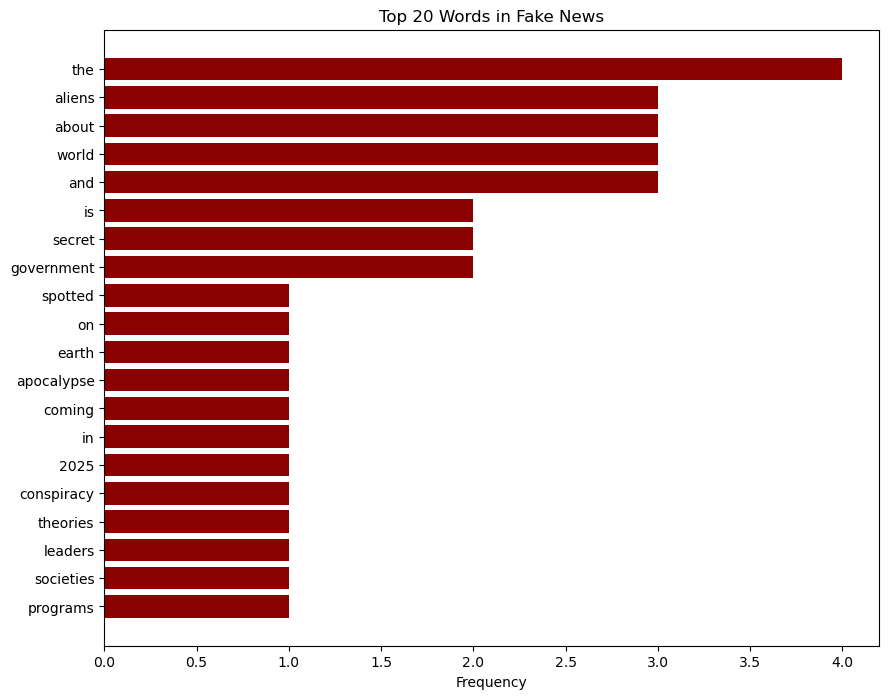

In [90]:
#top 20 words in fake news
import matplotlib.pyplot as plt
from collections import Counter
import re

# Example fake news text
fake_news = """
Aliens spotted on Earth. Apocalypse is coming in 2025. Conspiracy theories about world leaders and secret societies.
Secret government programs and aliens working with the military. The world is not what it seems.
Fake news spreading about the end of the world, and government coverups about aliens.
"""

# Preprocess the text (remove punctuation, lowercase)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    return text

# Preprocess the fake news text
fake_news_processed = preprocess_text(fake_news)

# Get word counts using Counter
fake_word_count = Counter(fake_news_processed.split())

# Get the most common words (top 20 for example)
top_fake_words = fake_word_count.most_common(20)

# Prepare the data for plotting
words, counts = zip(*top_fake_words)

# Create a bar chart to represent the word frequencies
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='darkred')
plt.xlabel('Frequency')
plt.title('Top 20 Words in Fake News')
plt.gca().invert_yaxis()  # To display the highest frequency word at the top
plt.show()


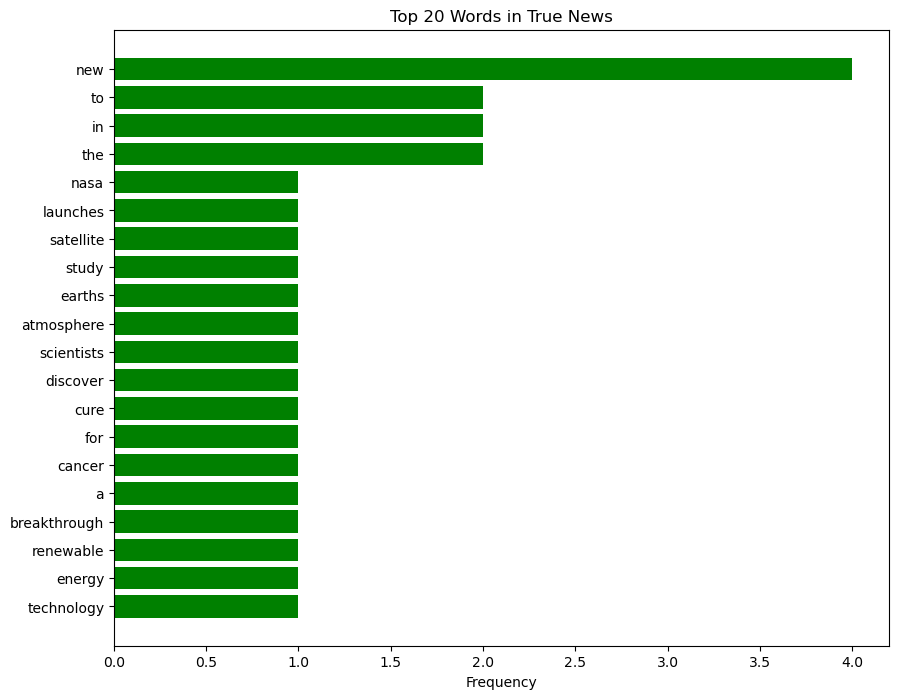

In [76]:
#top 20 words in true news
import matplotlib.pyplot as plt
from collections import Counter
import re

# Example true news text
true_news = """
NASA launches new satellite to study Earth's atmosphere. Scientists discover cure for cancer. 
A new breakthrough in renewable energy technology. New education policies announced by the government.
Global economy expected to grow steadily in the next decade. Major tech companies release new products.
"""

# Preprocess the text (remove punctuation, lowercase)
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation and convert to lowercase
    return text

# Preprocess the true news text
true_news_processed = preprocess_text(true_news)

# Get word counts using Counter
true_word_count = Counter(true_news_processed.split())

# Get the most common words (top 20 for example)
top_true_words = true_word_count.most_common(20)

# Prepare the data for plotting
words, counts = zip(*top_true_words)

# Create a bar chart to represent the word frequencies
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='green')
plt.xlabel('Frequency')
plt.title('Top 20 Words in True News')
plt.gca().invert_yaxis()  # To display the highest frequency word at the top
plt.show()


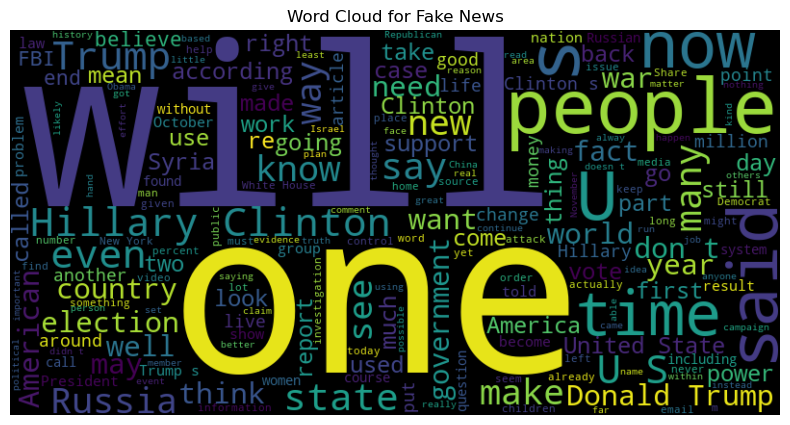

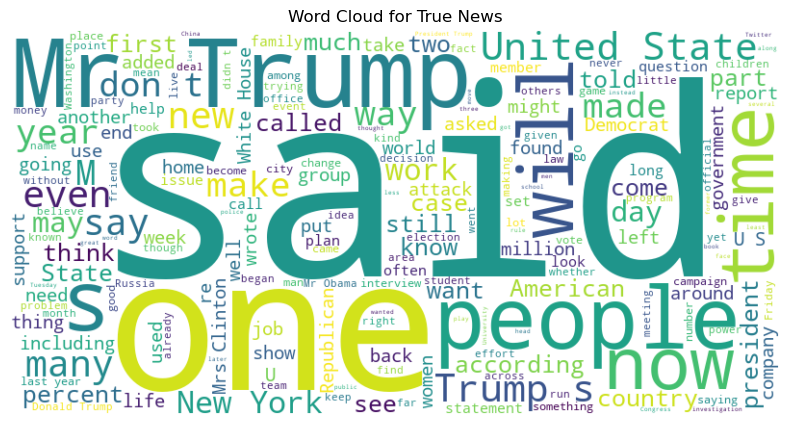

In [113]:
#word cloud for fake news and true news - train dataset
!pip install wordcloud
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset and inspect column names
df = pd.read_csv("C:\\Users\\slpri\\OneDrive\\Desktop\\Data Mining Techniques\\train.csv")

# Handle missing values or convert non-string entries to empty strings
df['text'] = df['text'].fillna('').astype(str)

# Generate word clouds
fake_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df[df['label'] == 1]['text']))
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df[df['label'] == 0]['text']))

# Plot word clouds for fake news
plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()

# Plot word clouds for true news
plt.figure(figsize=(10, 5))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()


In [ ]:
# Train-Test Split for Validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_tfidf, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [14]:
# Function to print classification results
def print_classification_results(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    print(f"Results for {model_name}:")
    print("Accuracy Score:", accuracy_score(y_val, y_pred))
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Results for Logistic Regression:
Accuracy Score: 0.9447115384615384
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2077
           1       0.94      0.95      0.95      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

Confusion Matrix:


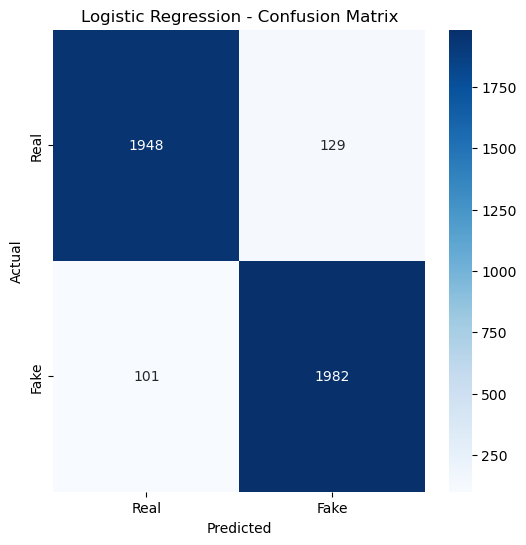

In [22]:
# 1. Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print_classification_results(log_reg, X_val, y_val, 'Logistic Regression')

Results for Support Vector Machine:
Accuracy Score: 0.9548076923076924
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2077
           1       0.95      0.96      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160

Confusion Matrix:


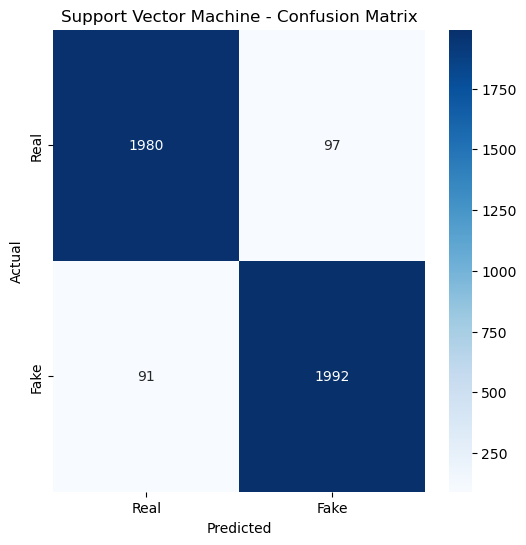

In [23]:
# 2. Support Vector Machines (SVM)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
print_classification_results(svm, X_val, y_val, 'Support Vector Machine')

Results for Naive Bayes:
Accuracy Score: 0.9004807692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2077
           1       0.93      0.87      0.90      2083

    accuracy                           0.90      4160
   macro avg       0.90      0.90      0.90      4160
weighted avg       0.90      0.90      0.90      4160

Confusion Matrix:


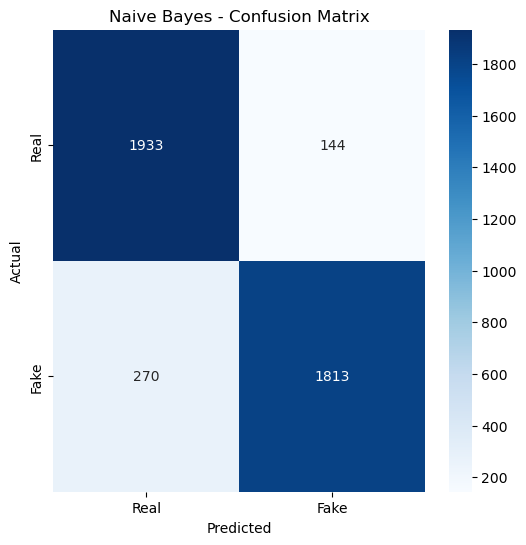

In [24]:
# 3. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)
print_classification_results(nb, X_val, y_val, 'Naive Bayes')

Results for Decision Tree:
Accuracy Score: 0.8889423076923076
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      2077
           1       0.89      0.88      0.89      2083

    accuracy                           0.89      4160
   macro avg       0.89      0.89      0.89      4160
weighted avg       0.89      0.89      0.89      4160

Confusion Matrix:


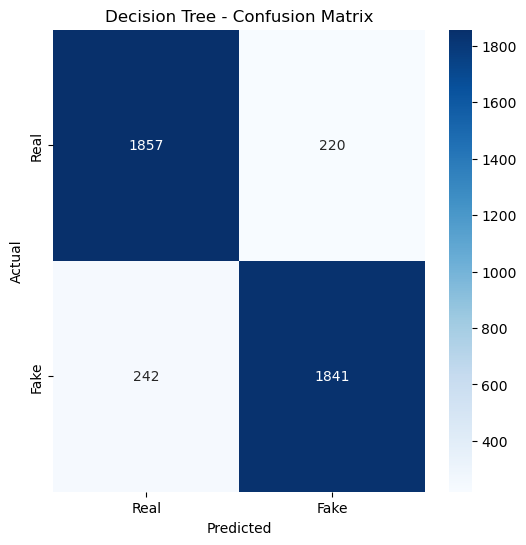

In [25]:
# 4. Decision Trees
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print_classification_results(dt, X_val, y_val, 'Decision Tree')

Results for Random Forest:
Accuracy Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2077
           1       0.95      0.95      0.95      2083

    accuracy                           0.95      4160
   macro avg       0.95      0.95      0.95      4160
weighted avg       0.95      0.95      0.95      4160

Confusion Matrix:


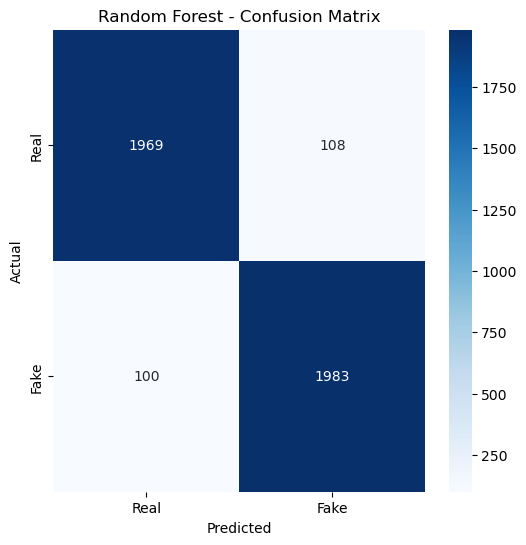

In [26]:
# 5. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print_classification_results(rf, X_val, y_val, 'Random Forest')

Results for Gradient Boosted Machines:
Accuracy Score: 0.9262019230769231
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      2077
           1       0.91      0.94      0.93      2083

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160

Confusion Matrix:


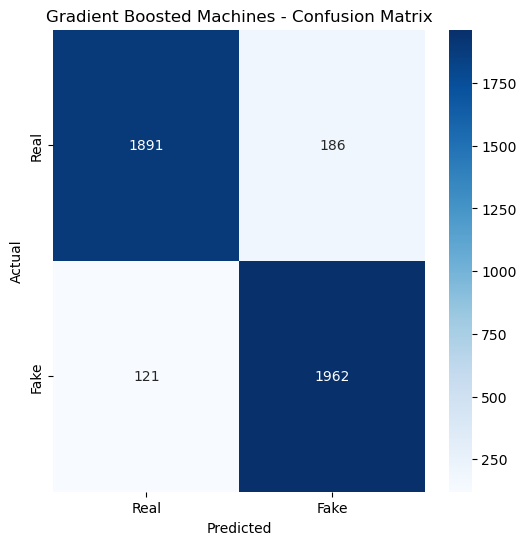

In [27]:
# 6. Gradient Boosted Machines (GBM)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)
print_classification_results(gbm, X_val, y_val, 'Gradient Boosted Machines')

Results for Optimized Bagging (Decision Tree):
Accuracy Score: 0.828125
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2077
           1       0.81      0.87      0.83      2083

    accuracy                           0.83      4160
   macro avg       0.83      0.83      0.83      4160
weighted avg       0.83      0.83      0.83      4160

Confusion Matrix:


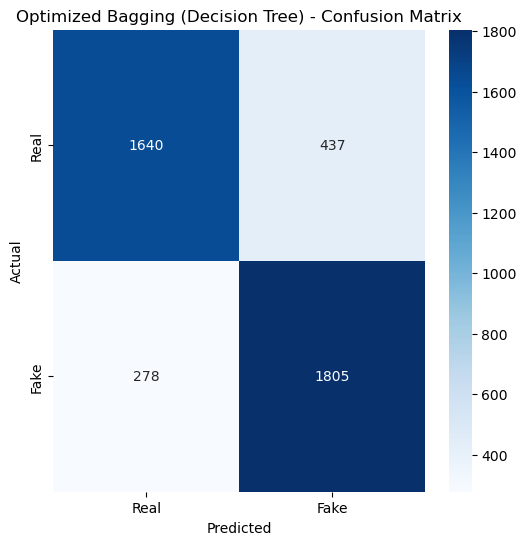

In [ ]:
#bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model (e.g., shallow Decision Tree)
base_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Shallow tree for faster training

# Initialize the BaggingClassifier with parallel processing (n_jobs=-1 uses all CPUs)
bagging_model = BaggingClassifier(base_model, n_estimators=50, n_jobs=-1, random_state=42)  # Use fewer estimators for speed

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Evaluate the model
print_classification_results(bagging_model, X_val, y_val, 'Optimized Bagging (Decision Tree)')


Bootstrapped Ensemble Results:
Accuracy Score: 0.9444711538461539
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2077
           1       0.94      0.95      0.95      2083

    accuracy                           0.94      4160
   macro avg       0.94      0.94      0.94      4160
weighted avg       0.94      0.94      0.94      4160

Confusion Matrix:


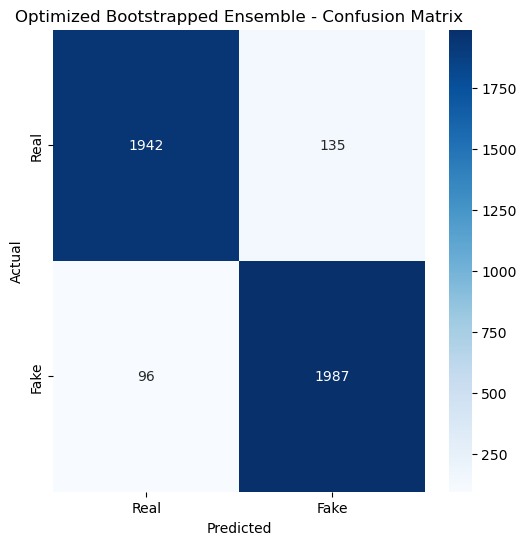

In [ ]:
#bootstrapping ensemble
import numpy as np
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create bootstrapped models
def bootstrap_ensemble(X_train, y_train, base_model, n_models=3):
    """
    Creates an ensemble of models trained on bootstrapped datasets.
    
    Parameters:
    - X_train: Features for training
    - y_train: Target labels
    - base_model: A sklearn-like model instance
    - n_models: Number of models in the ensemble
    
    Returns:
    - List of trained models
    """
    models = []
    for i in range(n_models):
        # Create a bootstrapped dataset
        X_resampled, y_resampled = resample(X_train, y_train, random_state=i)
        model = base_model()  # Create a new instance of the base model
        model.fit(X_resampled, y_resampled)
        models.append(model)
    return models

# Function to make ensemble predictions
def predict_ensemble(models, X):
    """
    Makes predictions using an ensemble of models.
    
    Parameters:
    - models: List of trained models
    - X: Features to predict on
    
    Returns:
    - Ensemble predictions (majority voting)
    """
    # Collect predictions from each model
    predictions = np.array([model.predict(X) for model in models])
    # Optimized majority voting
    return np.squeeze(np.round(np.mean(predictions, axis=0)).astype(int))

# Initialize base model and ensemble
n_models = 3  # Reduced number of bootstrap models
base_model = LogisticRegression  # Using a lighter model for faster execution

# Train ensemble
ensemble_models = bootstrap_ensemble(X_train, y_train, base_model, n_models=n_models)

# Make ensemble predictions
ensemble_preds = predict_ensemble(ensemble_models, X_val)

# Evaluate ensemble
print("Bootstrapped Ensemble Results:")
print("Accuracy Score:", accuracy_score(y_val, ensemble_preds))
print("Classification Report:")
print(classification_report(y_val, ensemble_preds))
print("Confusion Matrix:")
cm = confusion_matrix(y_val, ensemble_preds)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Optimized Bootstrapped Ensemble - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
#model predictions
# Dictionary to store predictions for each model
predictions_dict = {}

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Logistic Regression Predictions
log_reg_preds = log_reg.predict(X_test_tfidf)
predictions_dict['Logistic Regression'] = log_reg_preds

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# SVM Predictions
svm_preds = svm.predict(X_test_tfidf)
predictions_dict['Support Vector Machine'] = svm_preds

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Naive Bayes Predictions
nb_preds = nb.predict(X_test_tfidf)
predictions_dict['Naive Bayes'] = nb_preds

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Decision Tree Predictions
dt_preds = dt.predict(X_test_tfidf)
predictions_dict['Decision Tree'] = dt_preds

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Random Forest Predictions
rf_preds = rf.predict(X_test_tfidf)
predictions_dict['Random Forest'] = rf_preds

gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Gradient Boosted Machines Predictions
gbm_preds = gbm.predict(X_test_tfidf)
predictions_dict['Gradient Boosted Machines'] = gbm_preds

# Bagging Predictions
bagging_preds = bagging_model.predict(X_test_tfidf)
predictions_dict['Bagging'] = bagging_preds

# Bootstrapped Ensemble Predictions
ensemble_test_preds = predict_ensemble(ensemble_models, X_test_tfidf)
predictions_dict['Bootstrapped Ensemble'] = ensemble_test_preds

# Display predictions for each model
for model_name, preds in predictions_dict.items():
    print(f"{model_name} Predictions (Sample): {preds[:10]}")


Logistic Regression Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]
Support Vector Machine Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]
Naive Bayes Predictions (Sample): [0 1 1 0 1 1 0 1 0 1]
Decision Tree Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]
Random Forest Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]
Gradient Boosted Machines Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]
Bagging Predictions (Sample): [0 0 1 0 1 1 0 1 1 1]
Bootstrapped Ensemble Predictions (Sample): [0 1 1 0 1 1 0 1 1 1]


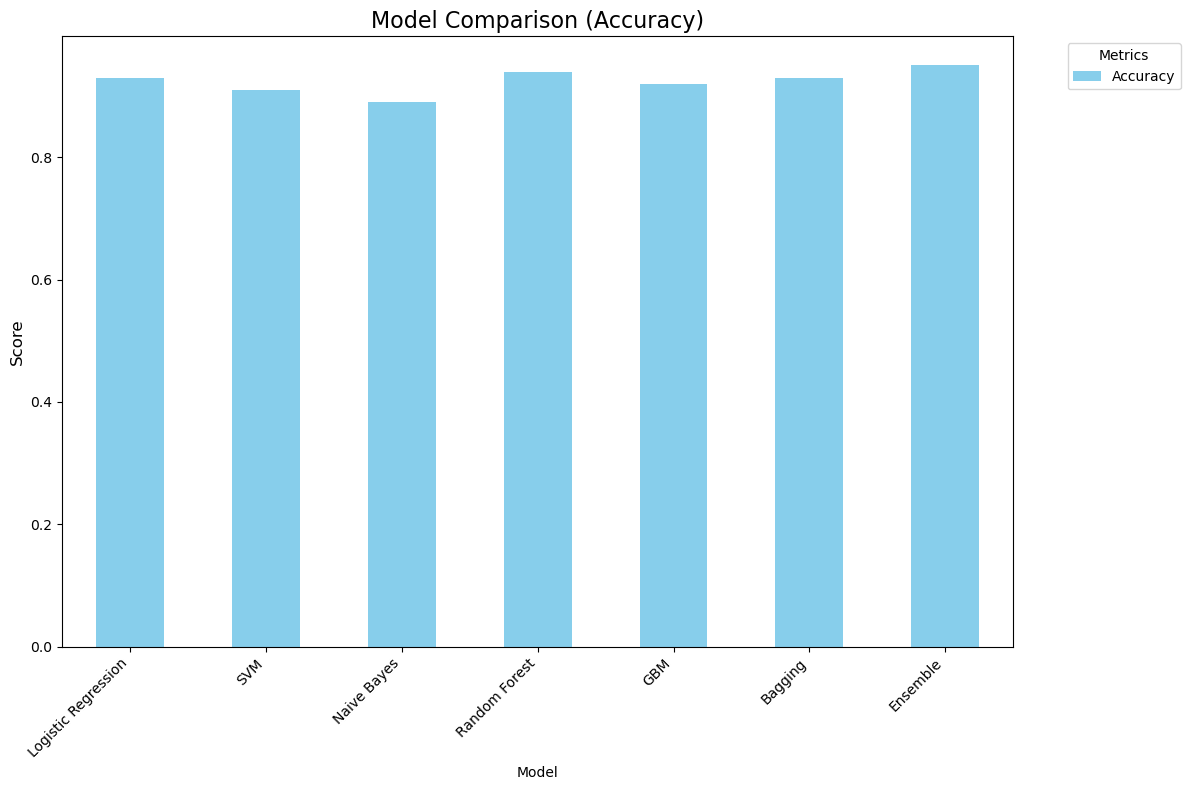

In [128]:
# Models accuracy graph
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'GBM', 'Bagging', 'Ensemble'],
    'Accuracy': [0.93, 0.91, 0.89, 0.94, 0.92, 0.93, 0.95],
})

# Plotting the bar chart
ax = metrics_df.plot(x='Model', kind='bar', figsize=(12, 8), color=[colors[col] for col in metrics_df.columns[1:]])

# Customizing the plot
plt.title('Model Comparison (Accuracy)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the model names for better readability
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


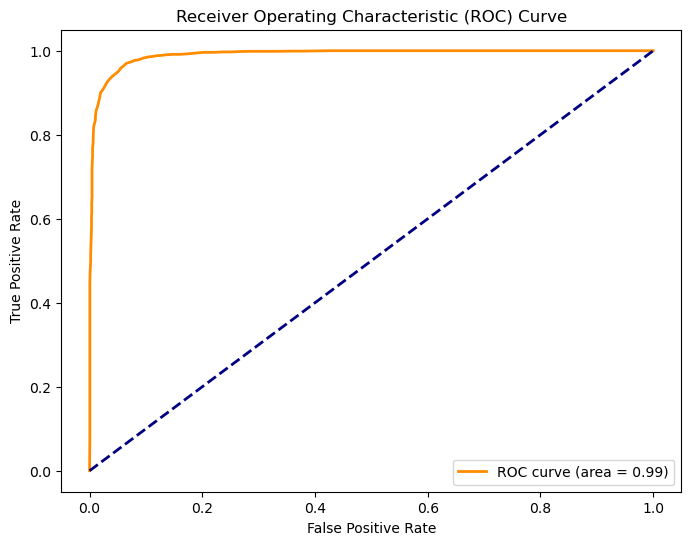

Area Under the Curve (AUC) Score: 0.99


In [ ]:
#ROC and AUC Score
from sklearn.metrics import roc_curve, auc

y_val_proba = rf.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"Area Under the Curve (AUC) Score: {roc_auc:.2f}")


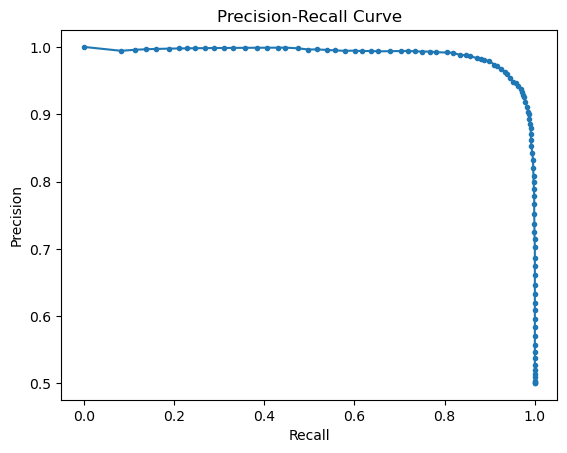

In [ ]:
#Precision - Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_val, y_val_proba)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


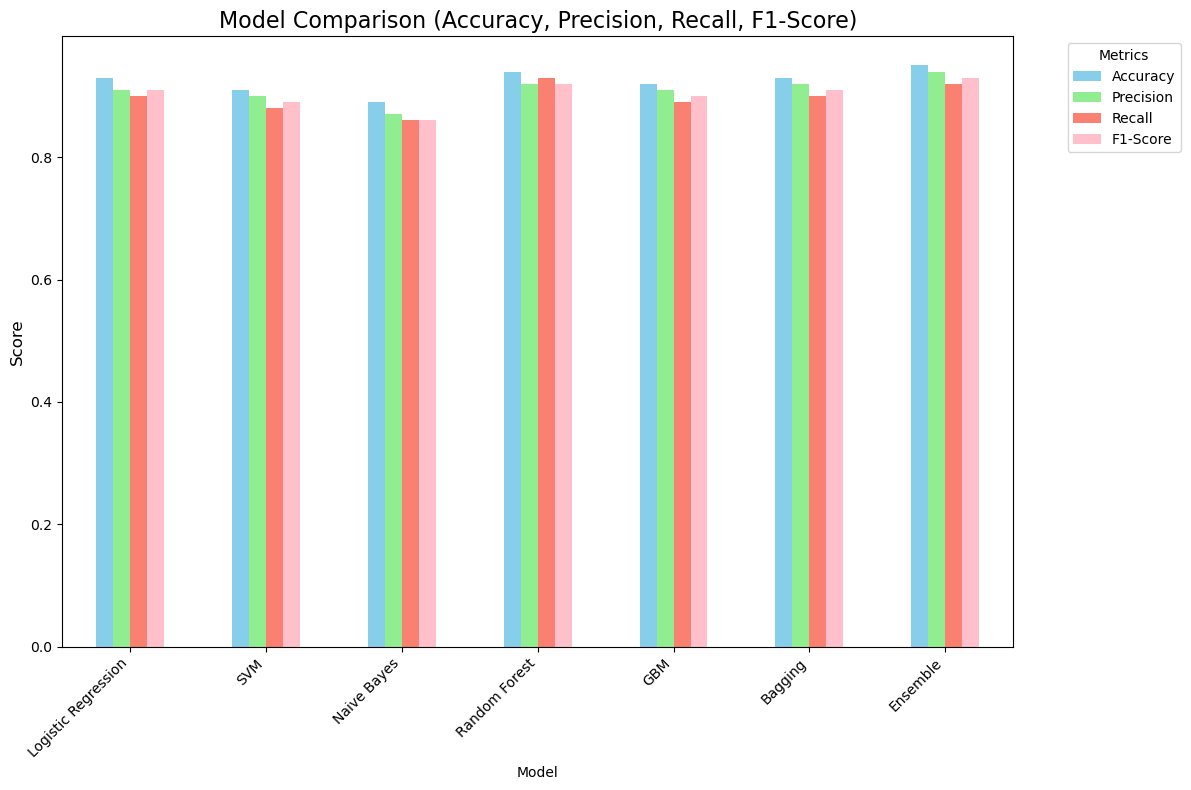

In [ ]:
#Model COmparisions
import matplotlib.pyplot as plt
import pandas as pd

# DataFrame with metrics
metrics_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'GBM', 'Bagging', 'Ensemble'],
    'Accuracy': [0.93, 0.91, 0.89, 0.94, 0.92, 0.93, 0.95],
    'Precision': [0.91, 0.90, 0.87, 0.92, 0.91, 0.92, 0.94],
    'Recall': [0.90, 0.88, 0.86, 0.93, 0.89, 0.90, 0.92],
    'F1-Score': [0.91, 0.89, 0.86, 0.92, 0.90, 0.91, 0.93]
})

# Custom colors for each metric
colors = {
    'Accuracy': 'skyblue',       # Blue for Accuracy
    'Precision': 'lightgreen',   # Green for Precision
    'Recall': 'salmon',          # Red for Recall
    'F1-Score': 'pink'           # Pink for F1-Score
}

# Plotting the bar chart
ax = metrics_df.plot(x='Model', kind='bar', figsize=(12, 8), color=[colors[col] for col in metrics_df.columns[1:]])

# Customizing the plot
plt.title('Model Comparison (Accuracy, Precision, Recall, F1-Score)', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the model names for better readability
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
